In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 15
BATCH_SIZE = 32

In [3]:
data = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\Admin\Downloads\Apple Project\Apple_Dataset',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 7771 files belonging to 4 classes.


In [4]:
class_names = data.class_names
class_names

['Apple Scab', 'Black Rot', 'Cedar Apple Rust', 'Healthy']

In [5]:
len(data)

243

In [6]:
243 * 32

7776

In [7]:
0.8 * len(data)

194.4

In [8]:
for image_batch, label_batch in data.take(1):
            print(image_batch[0].numpy())
            print(label_batch[0].numpy())

[[[  4.   0.  11.]
  [  4.   0.  11.]
  [  4.   0.  11.]
  ...
  [  0.   0.   7.]
  [  0.   1.   7.]
  [  0.   4.  10.]]

 [[190. 182. 197.]
  [158. 150. 165.]
  [128. 120. 135.]
  ...
  [ 15.  18.  25.]
  [ 15.  20.  26.]
  [ 10.  15.  21.]]

 [[143. 135. 150.]
  [153. 145. 160.]
  [181. 173. 188.]
  ...
  [ 29.  32.  39.]
  [ 30.  35.  41.]
  [ 18.  23.  29.]]

 ...

 [[146. 138. 161.]
  [139. 131. 154.]
  [144. 136. 159.]
  ...
  [ 18.  24.  40.]
  [ 18.  24.  40.]
  [ 17.  23.  39.]]

 [[150. 142. 165.]
  [142. 134. 157.]
  [144. 136. 159.]
  ...
  [ 18.  24.  40.]
  [ 18.  24.  40.]
  [ 17.  23.  39.]]

 [[156. 148. 171.]
  [147. 139. 162.]
  [147. 139. 162.]
  ...
  [ 18.  24.  40.]
  [ 18.  24.  40.]
  [ 17.  23.  39.]]]
0


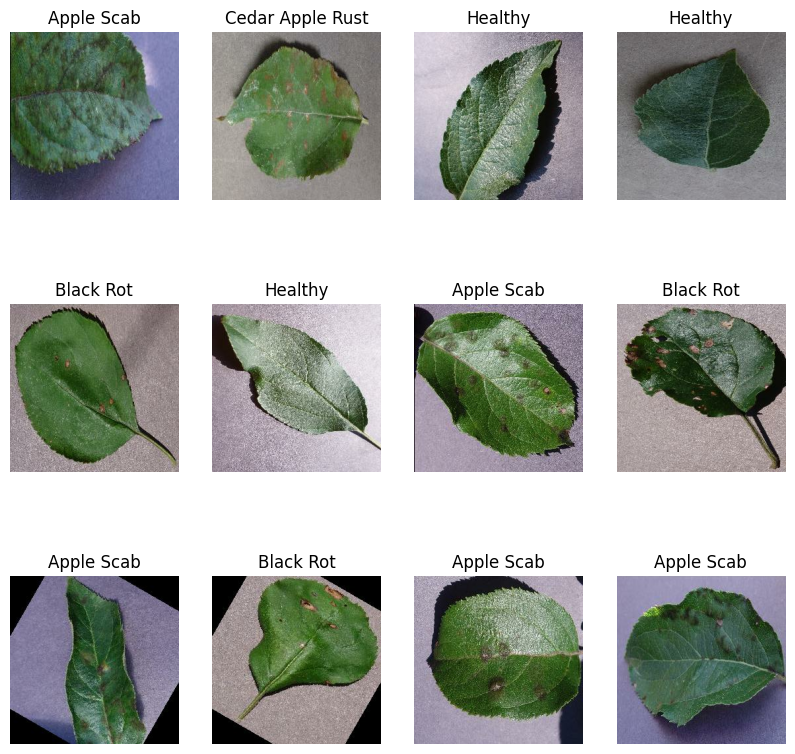

In [9]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in data.take(1):
    
    for i in range(12):
        ax = plt.subplot(3,4,i +1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')

In [10]:
def split_data(ds, train_per =0.8, test_per = 0.1, val_per = 0.1, shuffle_size = 10000, shuffle = True):
    
    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_per * ds_size)
    val_size = int(val_per * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, test_ds, val_ds

In [11]:
train_ds, test_ds, val_ds = split_data(data)

In [12]:
len(train_ds)

194

In [13]:
len(test_ds)

25

In [14]:
len(val_ds)

24

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

RESCALING AND RESIZING

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

resize_and_rescale = Sequential([
    Resizing(256, 256),
    Rescaling(1.0/255)
])


DATA AUGEMENTATION

In [17]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.models import Sequential

data_augementation = Sequential([RandomFlip('horizontal_and_vertical'),
                                 RandomRotation(0.2)])

In [18]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
model = models.Sequential([
    resize_and_rescale,
    data_augementation,
    layers.Conv2D(32, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation= 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation= 'relu'),
    layers.Dense(4, activation='softmax'),

])
model.build(input_shape= input_shape)

In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 2304)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 4)                │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 277,956 (1.06 MB)

 Trainable params: 277,956 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics = ['accuracy'])


In [21]:
model.fit(train_ds,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          verbose =1,
          validation_data = val_ds)

Epoch 1/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 500s 2s/step - accuracy: 0.6176 - loss: 0.8819 - val_accuracy: 0.6966 - val_loss: 1.1494
Epoch 2/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.8588 - loss: 0.3665 - val_accuracy: 0.8685 - val_loss: 0.4021
Epoch 3/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.9233 - loss: 0.1877 - val_accuracy: 0.8952 - val_loss: 0.3008
Epoch 4/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 542s 3s/step - accuracy: 0.9397 - loss: 0.1637 - val_accuracy: 0.9375 - val_loss: 0.1543
Epoch 5/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 0.9599 - loss: 0.1047 - val_accuracy: 0.9466 - val_loss: 0.1322
Epoch 6/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 496s 3s/step - accuracy: 0.9640 - loss: 0.0984 - val_accuracy: 0.9115 - val_loss: 0.2911
Epoch 7/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9719 - loss: 0.0776 - val_accuracy: 0.9010 - val_loss: 0.3777
Epoch 8/15
194/194 ━━━━━━━━━━━━━━━━━━━━ 524s 3s/step - accuracy: 0.9707 - loss: 0.0849 - val_accu

In [25]:
model.save(r'C:\Users\Admin\Downloads\Apple Project\models\version_2.keras')


In [27]:
scores = model.evaluate(test_ds)

25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 420ms/step - accuracy: 0.9850 - loss: 0.0432


In [28]:
scores

[0.043213728815317154, 0.9850000143051147]

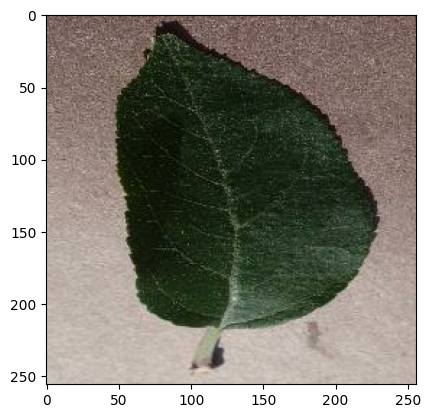

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

first image to predict
first image's actual label: Apple Scab
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
predicted label:  Apple Scab


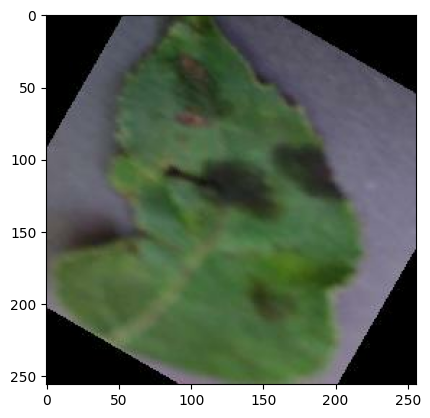

In [42]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0]

    print('first image to predict')
    plt.imshow(first_image)
    print("first image's actual label:", class_names[first_label])
    #prediction for the thirty images
    batch_prediction = model.predict(images_batch)
    #prediction for the first image
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])

In [53]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    #creating for bacth
    img_array = tf.expand_dims(img_array, axis =  0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


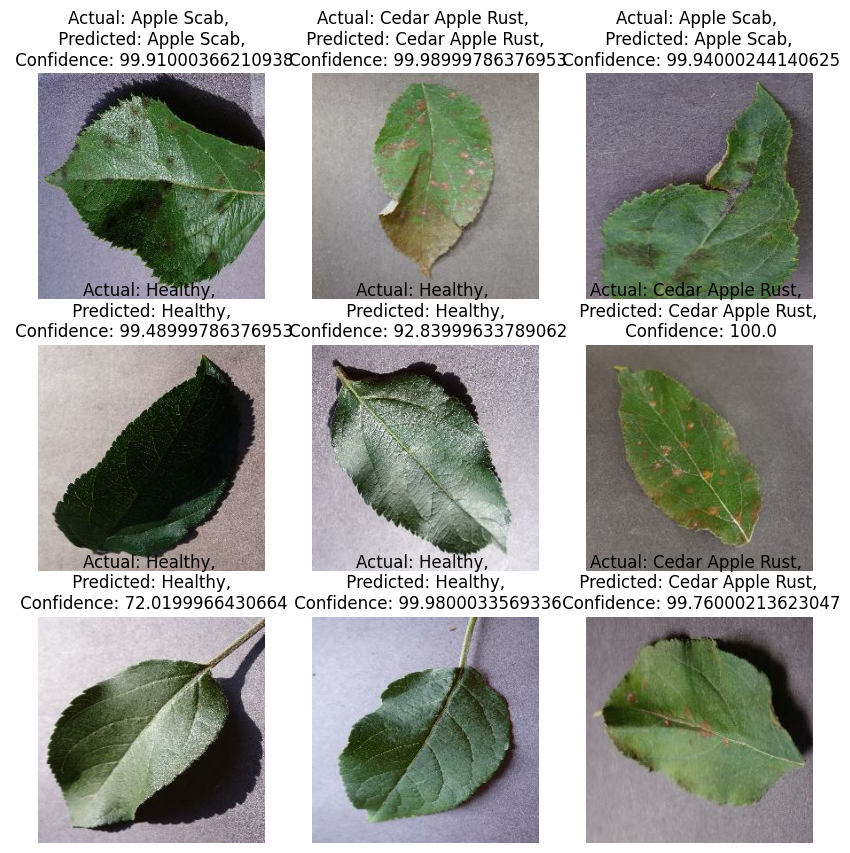

In [55]:
for images, labels in test_ds.take(1):
    plt.figure(figsize=(10,10))
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}, \n Confidence: {confidence}")
        plt.axis('off')
